In [55]:
import requests
import csv
from bs4 import BeautifulSoup
import os
import zipfile


def text_(body):
    """Extract text from html page from Goodreads"""
    soup = BeautifulSoup(body, 'html.parser')
    texts = soup.find_all('span', attrs={'id':True})
    #visible_texts = filter(tag_visible, texts)  
    return texts

def get_files(mappe):
    """get files, but only at the first level (note use of next())"""
    files = [os.path.join(mappe, f) for f in next(os.walk(mappe))[2]]
    
    return files

def get_file_contents_from_zip(zipmappe, extension='html'):
    zfile = zipfile.ZipFile(zipmappe)
    contents = dict()
    for fname in zfile.namelist():
        #print(finfo)
        if fname.endswith(extension):
            ifile = zfile.open(fname)
            contents[fname] = str(ifile.readlines())
    return contents
        
        


In [56]:
def extract_html_from_files(files):
    htmls = dict()
    for fname in files:
        with open(fname, encoding="utf-8") as f:
            htmls[fname] = f.readlines()
    return htmls

In [80]:
def get_user_comments_goodread(htmls):
    """Get reviews from Goodreads html pages, and return a dictionary of review texts"""
    reviews = dict()
    for html in htmls:
        
        soup = BeautifulSoup(htmls[html], 'lxml')
        spans = soup.find_all('span', attrs={'id':True})
        i = 0
        for span in spans:
            
            # Check if there is a review with more than meets the eyes - the one got by clicking the 'more'-button
            if span.has_attr('style') and span['id'].startswith('freeText') and span['style'] == 'display:none':
                #print("fullrev")
                reviews[span['id']] = span.text
                i += 1
            # if not the review is contained in the displayed text
            elif span['id'].startswith('freeTextContainer'):
                #print('delrev')
                reviews[span['id']] = span.text
                i += 1
        print(html, i)
    return reviews

def get_bokomtaler_bokelskere(htmls):
    reviews = []
    reviews = []
    for html in htmls:
        soup = BeautifulSoup(htmls[html], 'lxml')
        divs = soup.find_all('div', attrs={'class':True})
       
        for div in divs:
            divtext = ""
            if div['class'] == ['notattekst']:
                for p in div.find_all('p'):
                    divtext += p.text + "\n"
                reviews.append(divtext)
    return reviews

In [4]:
goodread_mappe = "C:/Users/larsj/Documents/HarryPotterGoodreads/"

In [69]:
zipmappe = "zips_gread_belskere/"

In [70]:
zips = [os.path.join(zipmappe,f) for f in next(os.walk(zipmappe))[2] if f.endswith(".zip")]

In [76]:
zips

['zips_gread_belskere/Diary.zip',
 'zips_gread_belskere/Drageloeperen.zip',
 'zips_gread_belskere/HarryPotter.zip',
 'zips_gread_belskere/LORD.zip',
 'zips_gread_belskere/MeEarl.zip',
 'zips_gread_belskere/MengeleZoo.zip',
 'zips_gread_belskere/TheFault.zip',
 'zips_gread_belskere/TheGirlWhoPlayed.zip',
 'zips_gread_belskere/Twilight.zip']

In [81]:
[get_user_comments_goodread(get_file_contents_from_zip(z)) for z in zips]

Diary/10Diary of an Oxygen Thief by Anonymous _ Goodreads.html 3
Diary/1Diary of an Oxygen Thief by Anonymous _ Goodreads.html 3
Diary/2Diary of an Oxygen Thief by Anonymous _ Goodreads.html 3
Diary/3Diary of an Oxygen Thief by Anonymous _ Goodreads.html 3
Diary/4Diary of an Oxygen Thief by Anonymous _ Goodreads.html 3
Diary/5Diary of an Oxygen Thief by Anonymous _ Goodreads.html 3
Diary/6Diary of an Oxygen Thief by Anonymous _ Goodreads.html 3
Diary/7Diary of an Oxygen Thief by Anonymous _ Goodreads.html 3
Diary/8Diary of an Oxygen Thief by Anonymous _ Goodreads.html 3
Diary/9Diary of an Oxygen Thief by Anonymous _ Goodreads.html 3
Drageloeperen/10Drageloperen by Khaled Hosseini _ Goodreads.html 4
Drageloeperen/2Drageloperen by Khaled Hosseini _ Goodreads.html 4
Drageloeperen/3Drageloperen by Khaled Hosseini _ Goodreads.html 4
Drageloeperen/4Drageloperen by Khaled Hosseini _ Goodreads.html 4
Drageloeperen/5Drageloperen by Khaled Hosseini _ Goodreads.html 4
Drageloeperen/6Drageloperen 

[{'freeTextContainer1374835108810732580': 'Hurt people hurt people.Say there was a novel in which Holden Caulfield was an alcoholic and Lolita was a photographer\\xe2\\x80\\x99s assistant and, somehow, they met in Bright Lights, Big City. He\\xe2\\x80\\x99s blinded by love. She by ambition. Diary of an Oxygen Thief is an honest, hilarious, and heartrending novel, but above all, a very realistic account of what we do to each other and what we',
  'freeText1374835108810732580': 'Hurt people hurt people.Say there was a novel in which Holden Caulfield was an alcoholic and Lolita was a photographer\\xe2\\x80\\x99s assistant and, somehow, they met in Bright Lights, Big City. He\\xe2\\x80\\x99s blinded by love. She by ambition. Diary of an Oxygen Thief is an honest, hilarious, and heartrending novel, but above all, a very realistic account of what we do to each other and what we allow to have done to us.',
  'freeTextContainer370720588925096047': 'Books can be attributed to "Anonymous" for se

In [24]:
from IPython.display import HTML

In [53]:
isinstance(htmls[0], str)

True

In [62]:
get_user_comments_goodread(htmls)

{'freeTextContainer1374835108810732580': 'Hurt people hurt people.Say there was a novel in which Holden Caulfield was an alcoholic and Lolita was a photographer\\xe2\\x80\\x99s assistant and, somehow, they met in Bright Lights, Big City. He\\xe2\\x80\\x99s blinded by love. She by ambition. Diary of an Oxygen Thief is an honest, hilarious, and heartrending novel, but above all, a very realistic account of what we do to each other and what we',
 'freeText1374835108810732580': 'Hurt people hurt people.Say there was a novel in which Holden Caulfield was an alcoholic and Lolita was a photographer\\xe2\\x80\\x99s assistant and, somehow, they met in Bright Lights, Big City. He\\xe2\\x80\\x99s blinded by love. She by ambition. Diary of an Oxygen Thief is an honest, hilarious, and heartrending novel, but above all, a very realistic account of what we do to each other and what we allow to have done to us.',
 'freeTextContainer370720588925096047': 'Books can be attributed to "Anonymous" for sever

In [6]:
with open(files) as f:
    dirs = f.read()

In [8]:
mapper = """Diary
Drageloeperen
HarryPotter
LORD2_Good
MeEarl
MengeleZoo""".split()

In [9]:
gr_mapper = {x:os.path.join("D:\Downloads", x, x) for x in mapper}

In [10]:
gr_mapper

{'Diary': 'D:\\Downloads\\Diary\\Diary',
 'Drageloeperen': 'D:\\Downloads\\Drageloeperen\\Drageloeperen',
 'HarryPotter': 'D:\\Downloads\\HarryPotter\\HarryPotter',
 'LORD2_Good': 'D:\\Downloads\\LORD2_Good\\LORD2_Good',
 'MeEarl': 'D:\\Downloads\\MeEarl\\MeEarl',
 'MengeleZoo': 'D:\\Downloads\\MengeleZoo\\MengeleZoo'}

In [11]:
grm = dict()
for i in gr_mapper:
    print(i)
    grm[i] = [os.path.join(gr_mapper[i],f) for f in next(os.walk(gr_mapper[i]))[2]]

Diary
Drageloeperen
HarryPotter
LORD2_Good
MeEarl
MengeleZoo


In [12]:
grm

{'Diary': ['D:\\Downloads\\Diary\\Diary\\10Diary of an Oxygen Thief by Anonymous _ Goodreads.html',
  'D:\\Downloads\\Diary\\Diary\\1Diary of an Oxygen Thief by Anonymous _ Goodreads.html',
  'D:\\Downloads\\Diary\\Diary\\2Diary of an Oxygen Thief by Anonymous _ Goodreads.html',
  'D:\\Downloads\\Diary\\Diary\\3Diary of an Oxygen Thief by Anonymous _ Goodreads.html',
  'D:\\Downloads\\Diary\\Diary\\4Diary of an Oxygen Thief by Anonymous _ Goodreads.html',
  'D:\\Downloads\\Diary\\Diary\\5Diary of an Oxygen Thief by Anonymous _ Goodreads.html',
  'D:\\Downloads\\Diary\\Diary\\6Diary of an Oxygen Thief by Anonymous _ Goodreads.html',
  'D:\\Downloads\\Diary\\Diary\\7Diary of an Oxygen Thief by Anonymous _ Goodreads.html',
  'D:\\Downloads\\Diary\\Diary\\8Diary of an Oxygen Thief by Anonymous _ Goodreads.html',
  'D:\\Downloads\\Diary\\Diary\\9Diary of an Oxygen Thief by Anonymous _ Goodreads.html'],
 'Drageloeperen': ['D:\\Downloads\\Drageloeperen\\Drageloeperen\\10Drageloperen by Khaled

In [14]:
from IPython.display import HTML

In [16]:
HTML(extract_html_from_files(grm['Diary'])[0])

Review of,ISBN 9789081058414
Rating,1 of 5 stars2 of 5 stars3 of 5 stars4 of 5 stars5 of 5 stars
Shelves,edit
Format,Paperback edit
Status,"June 11, 2019 – Shelved <!-- / If the book formats are same then append ""Other"" so that user is able to differentiate between his shelved book and ""other edition"". --> June 11, 2019 – Started Reading <!-- / If the book formats are same then append ""Other"" so that user is able to differentiate between his shelved book and ""other edition"". -->"
Progress,I'm on page of I am % done With Diary of an Oxygen Thief
Review,Add a review
,comment Write a comment...


In [18]:
get_user_comments_goodread([extract_html_from_files(grm['Diary'])[0]])

<!DOCTYPE html>
<htm
delrev
fullrev
delrev


{'freeTextContainer1374835108810732580': 'Hurt people hurt people.Say there was a novel in which Holden Caulfield was an alcoholic and Lolita was a photographer’s assistant and, somehow, they met in Bright Lights, Big City. He’s blinded by love. She by ambition. Diary of an Oxygen Thief is an honest, hilarious, and heartrending novel, but above all, a very realistic account of what we do to each other and what we',
 'freeText1374835108810732580': 'Hurt people hurt people.Say there was a novel in which Holden Caulfield was an alcoholic and Lolita was a photographer’s assistant and, somehow, they met in Bright Lights, Big City. He’s blinded by love. She by ambition. Diary of an Oxygen Thief is an honest, hilarious, and heartrending novel, but above all, a very realistic account of what we do to each other and what we allow to have done to us.',
 'freeTextContainer370720588925096047': 'Books can be attributed to "Anonymous" for several reasons: * They are officially published under that n

In [78]:
comments = {x:get_user_comments_goodread(extract_html_from_files(grm[x])) for x in grm}

In [79]:
comments.keys()

dict_keys(['Diary', 'Drageloeperen', 'HarryPotter', 'LORD2_Good', 'MeEarl', 'MengeleZoo'])

In [85]:
comments

{'Diary': {},
 'Drageloeperen': {},
 'HarryPotter': {},
 'LORD2_Good': {},
 'MeEarl': {},
 'MengeleZoo': {}}

In [12]:
files = get_files(goodread_mappe)

In [16]:
html = extract_html_from_files([files[0]])

In [23]:
reviews

['This is a Weasley appreciation post.',
 "“Don't let the muggles get you down.” Yup yup yup I love this book.",
 "This one is definitely my favourite of the 3 i've read so far.. :)(Watch my review here): https://youtu.be/gFZ99uPXiIU",
 "re-read in February 2016Harry is getting his sass on. I love it. Re-Read in December 2014 for Harry Christmas to YouOH MAN. THIS BOOK IS SO MY FAVORITE.The phone conversation at the beginning between Ron and Uncle Vernon was PRICELESS. I wish so much that that scene had been in the movie.I was so into reading this book that I failed to take notes, so I don't have many specifics to add except that I love how Crookshanks was basically Sirius's secret agent spy cat friend and I LOVE THAT.Also, this",
 "I'm beginning to wonder if there will ever be a Defence Against The Dark Arts teacher who is just a teacher.",
 'nope',
 'friends',
 "I last read this book when I was 14 years old, given that I'm almost 32 now, I have a whole new perspective on it. Despite 

In [72]:
get_files("C:/users/larsj/Downloads/BokelskereØya/")

['C:/users/larsj/Downloads/BokelskereØya/Innlegg.html',
 'C:/users/larsj/Downloads/BokelskereØya/Øya av Victoria Hislop.html']

In [54]:
øhtml = extract_html_from_files(get_files("C:/users/larsj/Downloads/BokelskereØya/"))

'\n<!DOCTYPE html>\n<html lang="en">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/>\n    \n    <meta name="description" content="\n                   &#34;Øya&#34;\n                   av Victoria Hislop -\n                   Se omtaler, sitater og terningkast.\n                   Se hva andre mener om denne boka, og fortell hva du mener selv!"/>\n\n    \n\n    \n\n\n    <link rel="stylesheet" href="/static/css/A.bokelskere.css,qv=020.pagespeed.cf.Qw-WapmYb1.css"/>\n    <link rel="shortcut icon" href="/static/grafikk/favicon.ico"/>\n    <link rel="apple-touch-icon" href="/static/grafikk/xb2ikon.png.pagespeed.ic.2tOnb2tSkC.png"/>\n\n    <script type="text/javascript" src="/static/js/jquery-1.8.0.min.js.pagespeed.jm.ecuXREQz1k.js"></script>\n    <script type="text/javascript" src="/static/js/jquery-ui-1.8.23.custom/js/jquery-ui-1.8.23.custom.min.js.pagespeed.jm.mIepTqWlYv.js"></script>\n    <script type="text/javascript" src="/static/js/b.js,qv=008.pages
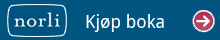
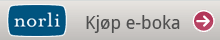
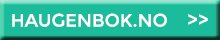
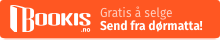

In [75]:
extract_html_from_files(get_files("C:/Users/larsj/Downloads/BokelskereØya/"))[1]

In [80]:
omtaler = get_bokomtaler_bokelskere(extract_html_from_files(get_files("C:/Users/larsj/Downloads/BokelskereØya/")))

In [79]:
from nbtokenizer import tokenize

In [91]:
from collections import Counter
words = dict()
i = 1
for t in omtaler:
    words[i] = Counter()
    words[i].update(tokenize(t))
    i += 1

In [85]:
import nbtext as nb

In [88]:
from module_update import update
update('nbtext', overwrite=True)

Updated file `C:\Users\larsj\Documents\Notebookprosjekter\nbtext.py`

In [89]:
import imp
imp.reload(nb)

<module 'nbtext' from 'C:\\Users\\larsj\\Documents\\Notebookprosjekter\\nbtext.py'>

In [100]:
df = nb.frame_sort(nb.frame(words).transpose().fillna(0))

In [104]:
nb.frame_sort(df.dot(df.transpose()), 'ligge')

,",",jeg,ikke,eller,en,i,.,det,at,føler,...,Bare,Øya,ligge,ligger,spesiell,interesse,medisinsk,historie,Midtpartiet,lepraøyene
",",758.0,349.0,166.0,49.0,223.0,260.0,742.0,302.0,154.0,12.0,...,6.0,26.0,17.0,6.0,6.0,6.0,6.0,35.0,6.0,1.0
jeg,349.0,340.0,119.0,39.0,78.0,91.0,348.0,209.0,96.0,12.0,...,2.0,28.0,12.0,2.0,2.0,2.0,2.0,11.0,2.0,0.0
.,742.0,348.0,195.0,35.0,251.0,293.0,910.0,299.0,185.0,6.0,...,4.0,30.0,12.0,4.0,4.0,4.0,4.0,37.0,4.0,1.0
det,302.0,209.0,78.0,27.0,78.0,105.0,299.0,188.0,76.0,6.0,...,1.0,17.0,10.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0
den,301.0,175.0,94.0,11.0,67.0,105.0,314.0,144.0,85.0,0.0,...,2.0,12.0,8.0,2.0,2.0,2.0,2.0,9.0,2.0,0.0
og,370.0,159.0,94.0,9.0,150.0,155.0,473.0,142.0,106.0,0.0,...,2.0,18.0,6.0,2.0,2.0,2.0,2.0,26.0,2.0,1.0
som,297.0,145.0,73.0,20.0,118.0,120.0,350.0,120.0,80.0,4.0,...,1.0,9.0,5.0,1.0,1.0,1.0,1.0,18.0,1.0,0.0
til,247.0,102.0,43.0,7.0,88.0,89.0,269.0,97.0,46.0,0.0,...,0.0,7.0,5.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
har,222.0,104.0,54.0,16.0,64.0,97.0,224.0,103.0,46.0,4.0,...,2.0,9.0,5.0,2.0,2.0,2.0,2.0,10.0,2.0,0.0
var,177.0,84.0,36.0,5.0,54.0,59.0,186.0,69.0,37.0,0.0,...,1.0,6.0,5.0,1.0,1.0,1.0,1.0,6.0,1.0,0.0


In [105]:
df_agg = nb.frame(df.sum(axis=1))

In [107]:
df_agg.loc['han hun jeg meg'.split()]

C:\Users\larsj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,0
han,NaN
hun,11.0
jeg,82.0
meg,18.0
